In [3]:
# 분석용 라이브러리
import numpy as np
import pandas as pd

# 시각화 라이브러리
%matplotlib inline
import seaborn as sns
import matplotlib.pyplot as plt
import plotly.express as px
import plotly.graph_objects as go

#warning
import warnings
warnings.filterwarnings('ignore')

In [2]:
dataPath = 'D:\\Data\\LGAI_AutoDriveSensors\\'

#import train and test CSV files
train = pd.read_csv(dataPath+'train.csv')

---
X와 Y간의 상관계수 비교

In [8]:
corr_df = train.corr()
corr_df
# 1에 가까울 수록 관계가 깊으며(강한 양의 상관관계) 0에 가까울 수록 관계가 적다(약한 양의 상관관계)

X_01      X_02      X_03  X_04      X_05      X_06      X_07  \
X_01  1.000000 -0.084611  0.211988   NaN  0.553974  0.626521 -0.008373   
X_02 -0.084611  1.000000 -0.028076   NaN -0.048915 -0.047862 -0.003771   
X_03  0.211988 -0.028076  1.000000   NaN -0.076944  0.407266  0.011814   
X_04       NaN       NaN       NaN   NaN       NaN       NaN       NaN   
X_05  0.553974 -0.048915 -0.076944   NaN  1.000000  0.104653 -0.032107   
...        ...       ...       ...   ...       ...       ...       ...   
Y_10  0.034081 -0.008553  0.107851   NaN  0.001554  0.060159 -0.017691   
Y_11  0.009947 -0.007557  0.034114   NaN  0.013407  0.012831 -0.002733   
Y_12  0.066904 -0.013885  0.111755   NaN  0.033491  0.070004 -0.015829   
Y_13  0.068074 -0.013285  0.112385   NaN  0.034294  0.069610 -0.016125   
Y_14  0.067083 -0.013482  0.109578   NaN  0.034546  0.069117 -0.017208   

          X_08      X_09      X_10  ...      Y_05      Y_06      Y_07  \
X_01  0.007622 -0.033579  0.011021  ...  0.011155 -0.007630 -0.038733   
X_02 -0.001676  0.002720 -0.001047  ... -0.008923 -0.005153  0.003732   
X_03  0.007182 -0.065713 -0.005502  ...  0.002662 -0.029823 -0.022002   
X_04       NaN       NaN       NaN  ...       NaN       NaN       NaN   
X_05 -0.005577 -0.009923 -0.001577  ... -0.001100  0.016569 -0.019453   
...        ...       ...       ...  ...       ...       ...       ...   
Y_10  0.008864  0.042074 -0.011320  ...  0.524548  0.699676 -0.385954   
Y_11 -0.008115 -0.002887 -0.018341  ...  0.685527  0.410842 -0.604134   
Y_12 -0.005884  0.003972 -0.017371  ...  0.535203  0.414966 -0.400218   
Y_13 -0.007206  0.005898 -0.018241  ...  0.533051  0.414371 -0.396800   
Y_14 -0.007067  0.004932 -0.015911  ...  0.538818  0.414623 -0.400789   

          Y_08      Y_09      Y_10      Y_11      Y_12      Y_13      Y_14  
X_01  0.071421  0.066141  0.034081  0.009947  0.066904  0.068074  0.067083  
X_02 -0.013776 -0.014633 -0.008553 -0.007557 -0.013885 -0.013285 -0.013482  
X_03  0.120045  0.108622  0.107851  0.034114  0.111755  0.112385  0.109578  
X_04       NaN       NaN       NaN       NaN       NaN       NaN       NaN  
X_05  0.035862  0.033445  0.001554  0.013407  0.033491  0.034294  0.034546  
...        ...       ...       ...       ...       ...       ...       ...  
Y_10  0.816150  0.805977  1.000000  0.809518  0.811730  0.810557  0.810940  
Y_11  0.846365  0.844375  0.809518  1.000000  0.845537  0.843500  0.846400  
Y_12  0.967685  0.967575  0.811730  0.845537  1.000000  0.979065  0.968542  
Y_13  0.967492  0.967353  0.810557  0.843500  0.979065  1.000000  0.968822  
Y_14  0.967331  0.967943  0.810940  0.846400  0.968542  0.968822  1.000000  

[70 rows x 70 columns]

In [9]:
s = corr_df.unstack()
s

X_01  X_01    1.000000
      X_02   -0.084611
      X_03    0.211988
      X_04         NaN
      X_05    0.553974
                ...   
Y_14  Y_10    0.810940
      Y_11    0.846400
      Y_12    0.968542
      Y_13    0.968822
      Y_14    1.000000
Length: 4900, dtype: float64

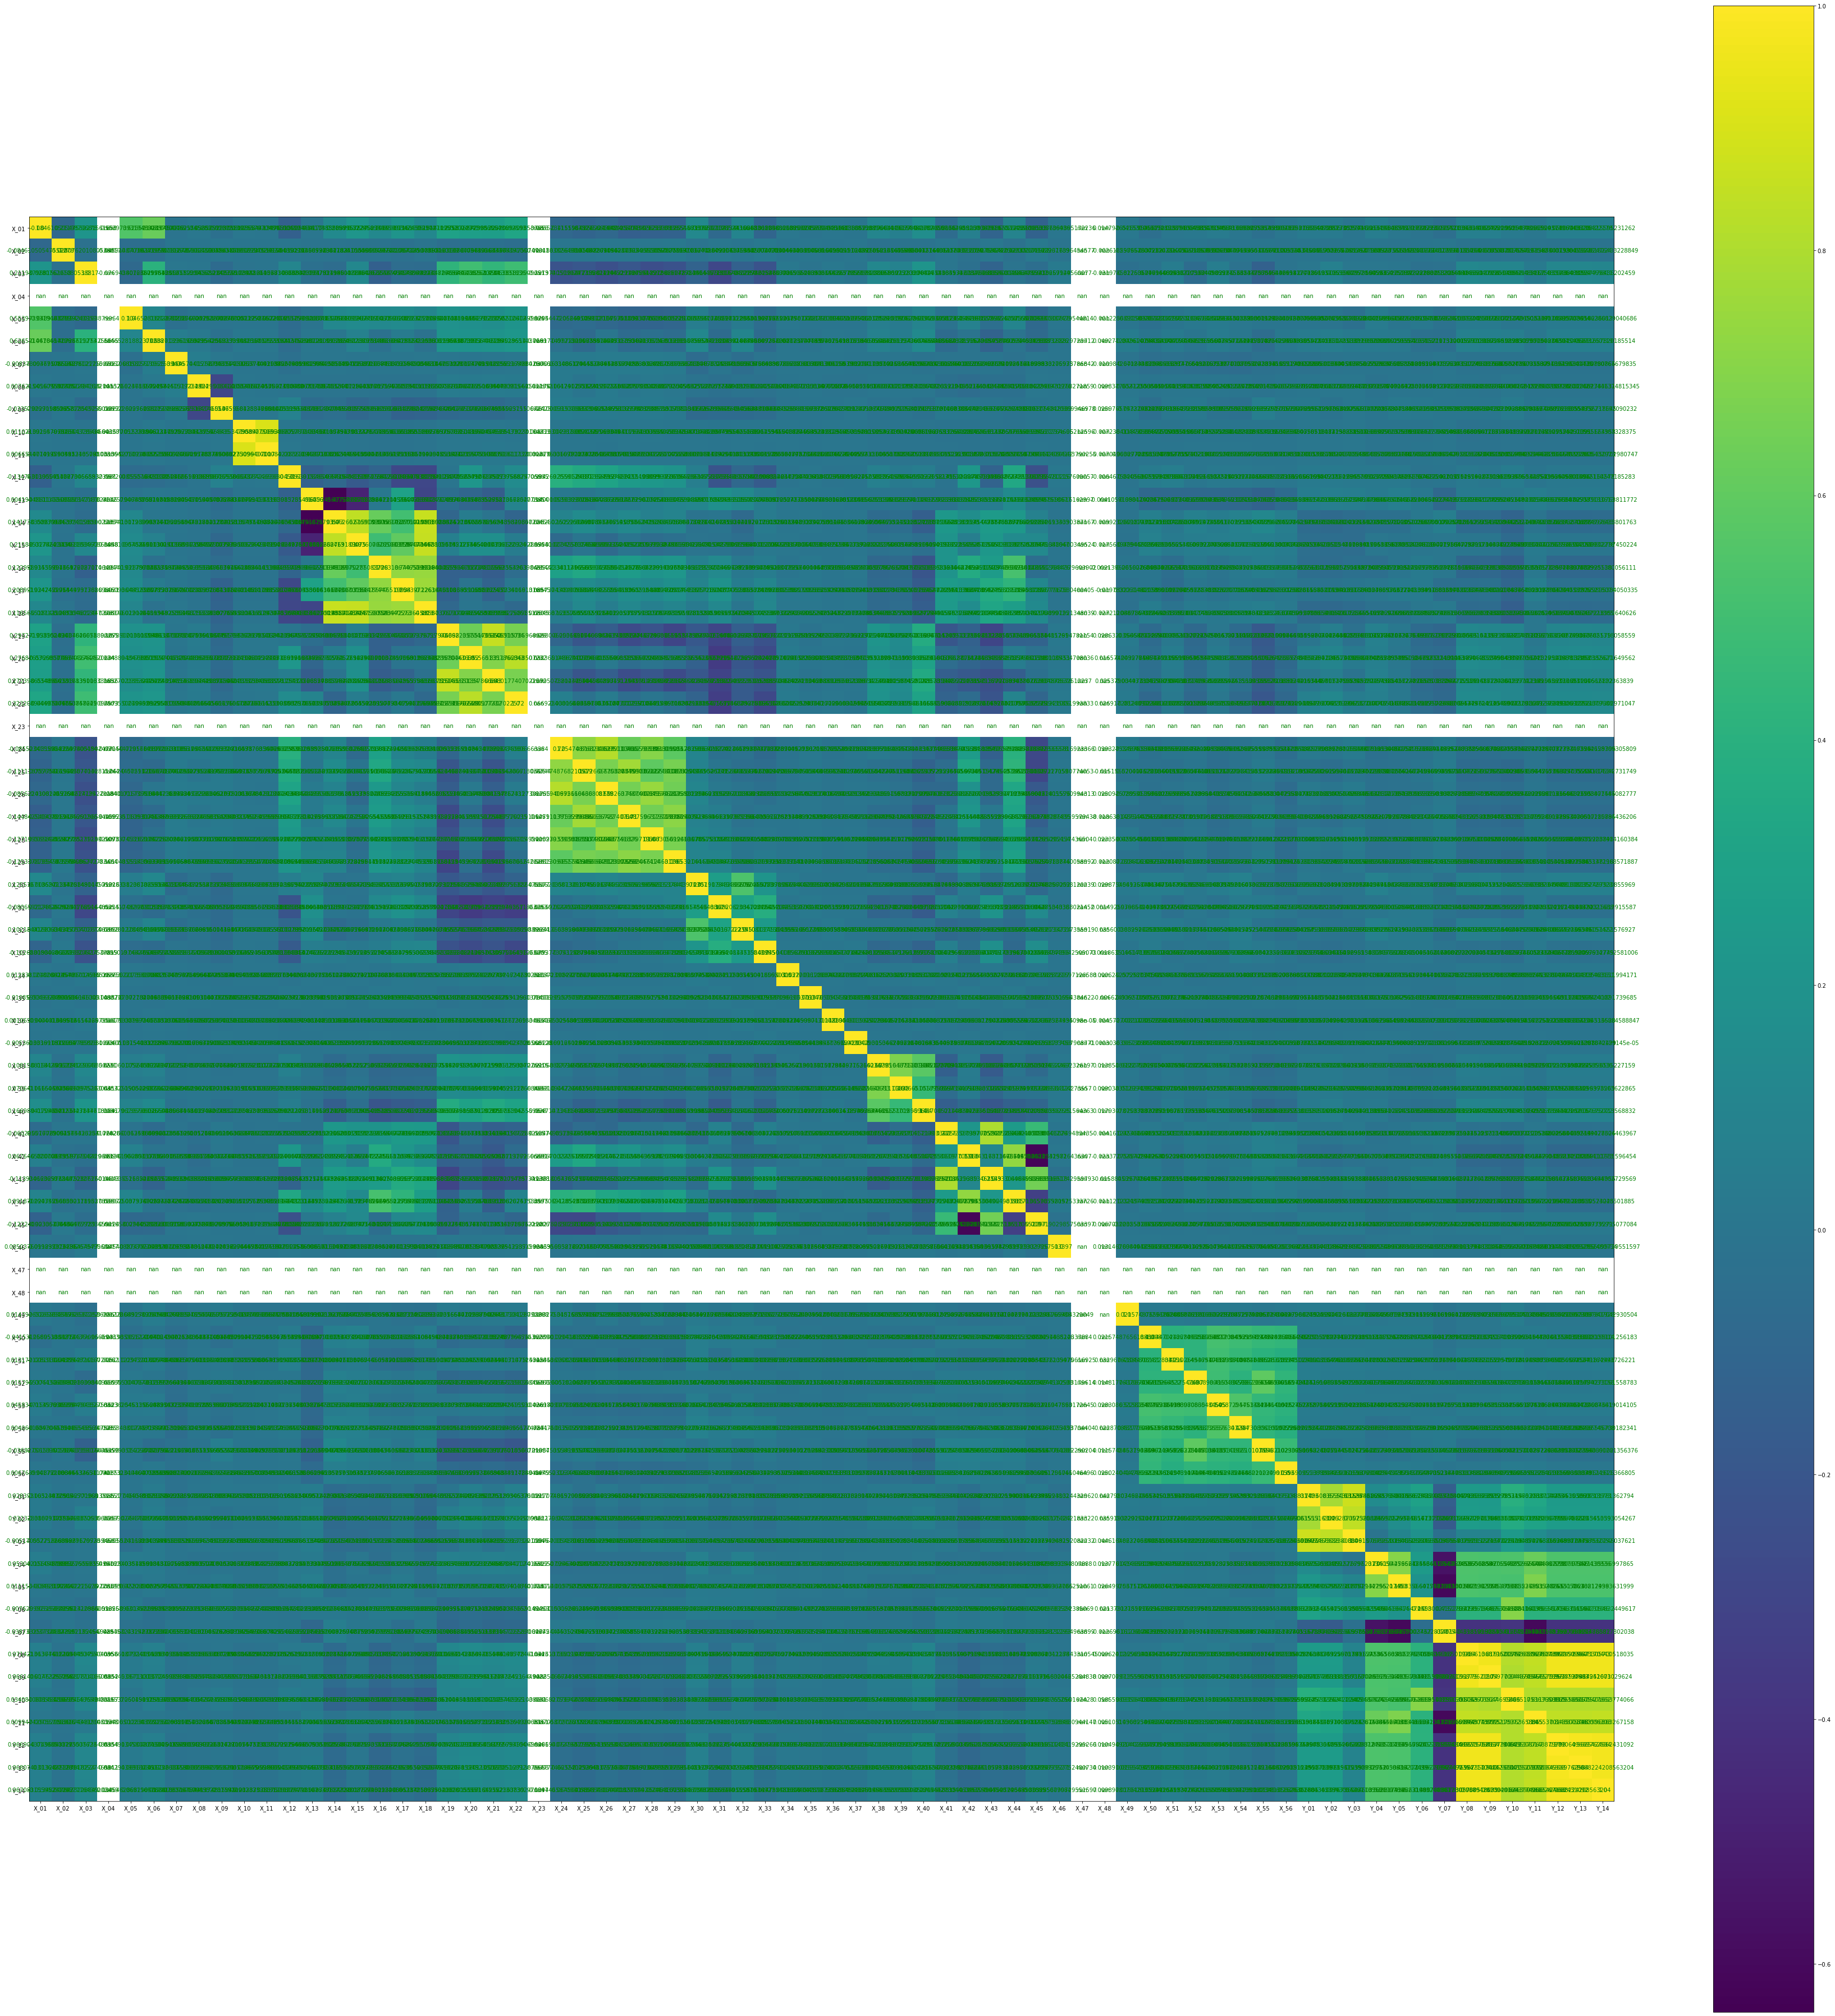

In [15]:
fig, ax = plt.subplots(figsize=(50,50))
im = ax.imshow(corr_df)

# Color Bar
cbar = ax.figure.colorbar(im, ax=ax)

ax.set_xticks(np.arange(len(corr_df.columns)))
ax.set_yticks(np.arange(len(corr_df.index)))

ax.set_xticklabels(corr_df.columns)
ax.set_yticklabels(corr_df.columns)

for x in range(len(corr_df.columns)):
    for y in range(len(corr_df.index)):
        ax.text(y, x, corr_df.iloc[y, x], ha='center', va='center', color='g')

fig.tight_layout()   
plt.show()    

In [12]:
corr5 = corr_df.nlargest(5, 'Y_01')
corr5 = corr5[list(corr5.index)]
corr5

Y_01      Y_03      Y_02      Y_10      Y_11
Y_01  1.000000  0.873430  0.779608  0.394000  0.331565
Y_03  0.873430  1.000000  0.846287  0.247422  0.157009
Y_02  0.779608  0.846287  1.000000  0.364331  0.307481
Y_10  0.394000  0.247422  0.364331  1.000000  0.809518
Y_11  0.331565  0.157009  0.307481  0.809518  1.000000

---

In [56]:
xy_corr = corr_df.iloc[:56, 56:]
xy_corr

Y_01      Y_02      Y_03      Y_04      Y_05      Y_06      Y_07  \
X_01  0.028393  0.032328 -0.005171  0.053042  0.011155 -0.007630 -0.038733   
X_02 -0.005138 -0.010092 -0.002252 -0.001451 -0.008923 -0.005153  0.003732   
X_03  0.009143  0.071669  0.008270  0.009522  0.002662 -0.029823 -0.022002   
X_04       NaN       NaN       NaN       NaN       NaN       NaN       NaN   
X_05 -0.003528 -0.006990 -0.032955  0.040294 -0.001100  0.016569 -0.019453   
X_06  0.040484  0.054751  0.031122  0.038120  0.022089 -0.030357 -0.031527   
X_07 -0.021249 -0.006676 -0.003445 -0.003451 -0.002906 -0.008854  0.003107   
X_08  0.007270  0.012884  0.013229 -0.016829 -0.001379  0.000897  0.005572   
X_09  0.016223 -0.015630  0.007635  0.000510  0.022068  0.015840  0.003295   
X_10  0.008343  0.007071  0.012133 -0.008202 -0.009099 -0.005883  0.006438   
X_11  0.010031  0.006574  0.010247 -0.005488 -0.005806 -0.004467  0.002547   
X_12  0.031651  0.032968  0.023162  0.025600  0.022359 -0.008092 -0.004275   
X_13  0.051858  0.062530  0.056866  0.032815  0.063070  0.014003 -0.086622   
X_14 -0.057243 -0.074486 -0.054292 -0.033449 -0.034759  0.014862  0.059180   
X_15 -0.042687 -0.045245 -0.051547  0.008849 -0.005380  0.007081  0.008189   
X_16 -0.045348 -0.056141 -0.031003 -0.043292 -0.004334  0.030848  0.007990   
X_17 -0.007689 -0.015572 -0.001841  0.011309  0.039394  0.033714 -0.038919   
X_18 -0.070509 -0.079965 -0.061317 -0.025465 -0.028224  0.009811  0.024976   
X_19  0.000464  0.059807 -0.026838  0.075433  0.019175 -0.063676 -0.093032   
X_20  0.065749  0.102794  0.036574  0.069409  0.008679 -0.049515 -0.061651   
X_21  0.009129  0.063447 -0.017176  0.075232  0.015732 -0.057248 -0.086303   
X_22  0.075120  0.116784  0.048363  0.065870  0.014356 -0.048523 -0.081957   
X_23       NaN       NaN       NaN       NaN       NaN       NaN       NaN   
X_24  0.021707  0.002228  0.029767 -0.031951 -0.018114 -0.012012  0.026424   
X_25 -0.019210 -0.047233 -0.010171 -0.024640 -0.019783 -0.000627  0.040110   
X_26  0.023325 -0.001188  0.030061 -0.029416 -0.022603 -0.014671  0.026599   
X_27 -0.013966 -0.038632  0.000027 -0.027718 -0.023178 -0.004950  0.034254   
X_28  0.025280  0.004690  0.039932 -0.030980 -0.023553 -0.005095  0.028755   
X_29  0.009425 -0.017807  0.024919 -0.028769 -0.026367  0.002273  0.039454   
X_30  0.020524 -0.002918 -0.004941  0.080688  0.036969  0.044699 -0.023568   
X_31 -0.027477 -0.035672 -0.011455  0.003088  0.024690  0.034647 -0.013022   
X_32  0.005400 -0.012539 -0.014587  0.073863  0.038276  0.029020 -0.031823   
X_33 -0.030811 -0.039738 -0.024451  0.009813  0.024972  0.026505 -0.006360   
X_34 -0.000769  0.000120 -0.002251  0.005848  0.004675 -0.003516 -0.004170   
X_35  0.001088  0.003449  0.004185  0.010116  0.013750 -0.000296 -0.005681   
X_36 -0.004959 -0.003896  0.000725 -0.003665 -0.001289 -0.005246  0.002511   
X_37  0.000310 -0.002178  0.001247  0.009614  0.012141 -0.000043 -0.008121   
X_38  0.023031  0.032319  0.010836  0.011566 -0.016005 -0.020858 -0.005382   
X_39  0.022046  0.028464  0.013698  0.008989 -0.010757 -0.013150 -0.001224   
X_40  0.037534  0.059302  0.018141  0.023821 -0.018642 -0.034211 -0.024686   
X_41  0.005500  0.002081  0.023859 -0.015400 -0.000212  0.026107  0.038114   
X_42 -0.033644 -0.044825 -0.022560 -0.009116 -0.001648  0.002630  0.014922   
X_43  0.016262  0.006882  0.038465 -0.025894 -0.001628  0.036671  0.025305   
X_44 -0.001202 -0.009830  0.006396 -0.020647  0.003923  0.006946  0.006031   
X_45  0.030217  0.030606  0.038192 -0.014646  0.000161  0.023090  0.009477   
X_46 -0.023462 -0.014427 -0.018700  0.004299  0.009210  0.008920 -0.003628   
X_47       NaN       NaN       NaN       NaN       NaN       NaN       NaN   
X_48       NaN       NaN       NaN       NaN       NaN       NaN       NaN   
X_49  0.042798  0.035919  0.044616  0.013776  0.026500  0.021373 -0.012696   
X_50  0.034662  0.022916  0.022746  0.029389  0.031173  0.027812 -0.012394   
X_51  0.057450  0.041112  0.0405

In [57]:
s = xy_corr.unstack()
s

Y_01  X_01    0.028393
      X_02   -0.005138
      X_03    0.009143
      X_04         NaN
      X_05   -0.003528
                ...   
Y_14  X_52    0.021774
      X_53    0.044306
      X_54    0.005487
      X_55   -0.027391
      X_56    0.013496
Length: 784, dtype: float64

In [64]:
xy_corr.index

Index(['X_01', 'X_02', 'X_03', 'X_04', 'X_05', 'X_06', 'X_07', 'X_08', 'X_09',
       'X_10', 'X_11', 'X_12', 'X_13', 'X_14', 'X_15', 'X_16', 'X_17', 'X_18',
       'X_19', 'X_20', 'X_21', 'X_22', 'X_23', 'X_24', 'X_25', 'X_26', 'X_27',
       'X_28', 'X_29', 'X_30', 'X_31', 'X_32', 'X_33', 'X_34', 'X_35', 'X_36',
       'X_37', 'X_38', 'X_39', 'X_40', 'X_41', 'X_42', 'X_43', 'X_44', 'X_45',
       'X_46', 'X_47', 'X_48', 'X_49', 'X_50', 'X_51', 'X_52', 'X_53', 'X_54',
       'X_55', 'X_56'],
      dtype='object')

In [66]:
xy_corr.columns

Index(['Y_01', 'Y_02', 'Y_03', 'Y_04', 'Y_05', 'Y_06', 'Y_07', 'Y_08', 'Y_09',
       'Y_10', 'Y_11', 'Y_12', 'Y_13', 'Y_14'],
      dtype='object')

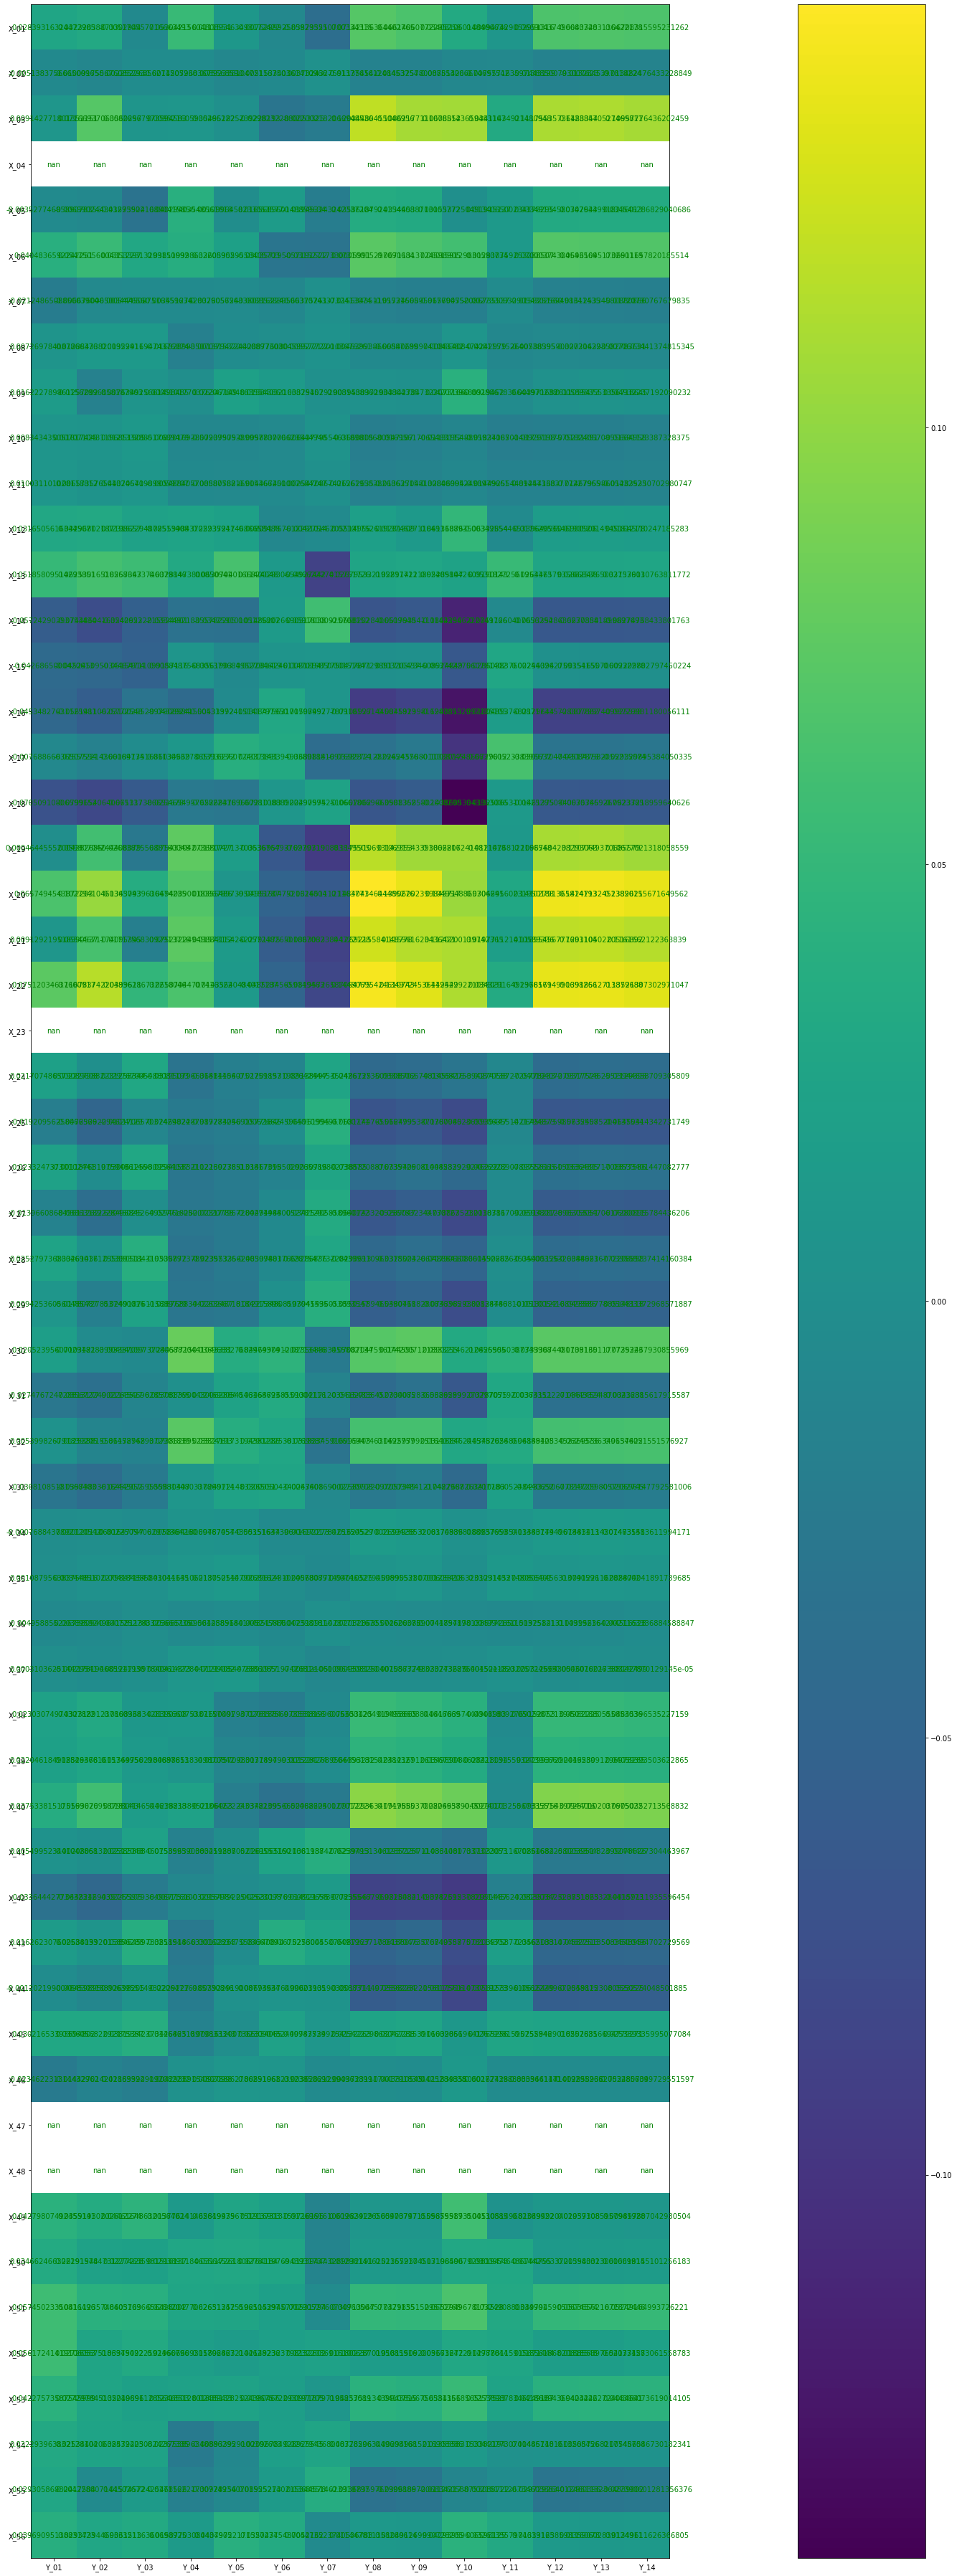

In [76]:
fig, ax = plt.subplots(figsize=(50,50))
im = ax.imshow(xy_corr)

# Color Bar
cbar = ax.figure.colorbar(im, ax=ax)

ax.set_xticks(np.arange(len(xy_corr.columns)))
ax.set_yticks(np.arange(len(xy_corr.index)))

ax.set_xticklabels(xy_corr.columns)
ax.set_yticklabels(xy_corr.index)

for x in range(len(xy_corr.columns)):
    for y in range(len(xy_corr.index)):
        ax.text(x, y, xy_corr.iloc[y, x], ha='center', va='center', color='g')

fig.tight_layout()   
plt.show()    

In [78]:
corr5 = xy_corr.nlargest(5, 'Y_01')
corr5 = corr5[list(corr5.columns)]
corr5

Y_01      Y_02      Y_03      Y_04      Y_05      Y_06      Y_07  \
X_22  0.075120  0.116784  0.048363  0.065870  0.014356 -0.048523 -0.081957   
X_20  0.065749  0.102794  0.036574  0.069409  0.008679 -0.049515 -0.061651   
X_51  0.057450  0.041112  0.040511  0.028420  0.026313  0.021153 -0.002905   
X_52  0.056172  0.027266  0.033455  0.019607  0.017065  0.021492  0.023220   
X_13  0.051858  0.062530  0.056866  0.032815  0.063070  0.014003 -0.086622   

          Y_08      Y_09      Y_10      Y_11      Y_12      Y_13      Y_14  
X_22  0.144807  0.134972  0.112550  0.034329  0.137658  0.139185  0.135213  
X_20  0.148404  0.139062  0.104955  0.030470  0.141028  0.142471  0.138902  
X_51  0.049606  0.047986  0.065295  0.032491  0.049795  0.050366  0.052492  
X_52  0.018023  0.018115  0.031616  0.027788  0.018562  0.018856  0.021774  
X_13  0.026795  0.028914  0.024098  0.053183  0.026447  0.026685  0.027579

In [79]:
corr5 = xy_corr.nlargest(5, 'Y_02')
corr5 = corr5[list(corr5.columns)]
corr5

Y_01      Y_02      Y_03      Y_04      Y_05      Y_06      Y_07  \
X_22  0.075120  0.116784  0.048363  0.065870  0.014356 -0.048523 -0.081957   
X_20  0.065749  0.102794  0.036574  0.069409  0.008679 -0.049515 -0.061651   
X_03  0.009143  0.071669  0.008270  0.009522  0.002662 -0.029823 -0.022002   
X_21  0.009129  0.063447 -0.017176  0.075232  0.015732 -0.057248 -0.086303   
X_13  0.051858  0.062530  0.056866  0.032815  0.063070  0.014003 -0.086622   

          Y_08      Y_09      Y_10      Y_11      Y_12      Y_13      Y_14  
X_22  0.144807  0.134972  0.112550  0.034329  0.137658  0.139185  0.135213  
X_20  0.148404  0.139062  0.104955  0.030470  0.141028  0.142471  0.138902  
X_03  0.120045  0.108622  0.107851  0.034114  0.111755  0.112385  0.109578  
X_21  0.126922  0.115962  0.112020  0.019771  0.118955  0.120111  0.116166  
X_13  0.026795  0.028914  0.024098  0.053183  0.026447  0.026685  0.027579

In [80]:
corr5 = xy_corr.nlargest(5, 'Y_08')
corr5 = corr5[list(corr5.columns)]
corr5

Y_01      Y_02      Y_03      Y_04      Y_05      Y_06      Y_07  \
X_20  0.065749  0.102794  0.036574  0.069409  0.008679 -0.049515 -0.061651   
X_22  0.075120  0.116784  0.048363  0.065870  0.014356 -0.048523 -0.081957   
X_21  0.009129  0.063447 -0.017176  0.075232  0.015732 -0.057248 -0.086303   
X_03  0.009143  0.071669  0.008270  0.009522  0.002662 -0.029823 -0.022002   
X_19  0.000464  0.059807 -0.026838  0.075433  0.019175 -0.063676 -0.093032   

          Y_08      Y_09      Y_10      Y_11      Y_12      Y_13      Y_14  
X_20  0.148404  0.139062  0.104955  0.030470  0.141028  0.142471  0.138902  
X_22  0.144807  0.134972  0.112550  0.034329  0.137658  0.139185  0.135213  
X_21  0.126922  0.115962  0.112020  0.019771  0.118955  0.120111  0.116166  
X_03  0.120045  0.108622  0.107851  0.034114  0.111755  0.112385  0.109578  
X_19  0.117591  0.106915  0.106221  0.012148  0.109676  0.110775  0.106770

상관계수 커봤자 0.1이라서 그다지 실효성은 모르겠다.